In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-jan-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-jan-2022/train.csv
/kaggle/input/tabular-playground-series-jan-2022/test.csv


In [2]:
df = pd.read_csv("../input/tabular-playground-series-jan-2022/train.csv")
df1 = pd.read_csv("../input/tabular-playground-series-jan-2022/test.csv")


In [3]:
df.head()

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26298 entries, 0 to 26297
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   row_id    26298 non-null  int64 
 1   date      26298 non-null  object
 2   country   26298 non-null  object
 3   store     26298 non-null  object
 4   product   26298 non-null  object
 5   num_sold  26298 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.2+ MB


In [5]:
df.describe()

,row_id,num_sold
count,26298.000000,26298.000000
mean,13148.500000,387.533577
std,7591.723026,266.076193
min,0.000000,70.000000
25%,6574.250000,190.000000
50%,13148.500000,315.000000
75%,19722.750000,510.000000
max,26297.000000,2884.000000


In [6]:
df = df.iloc[:, 1:]
df.head()

,date,country,store,product,num_sold
0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911


In [7]:
df.describe()

,num_sold
count,26298.000000
mean,387.533577
std,266.076193
min,70.000000
25%,190.000000
50%,315.000000
75%,510.000000
max,2884.000000


In [8]:
df['country'].value_counts()

Finland    8766
Norway     8766
Sweden     8766
Name: country, dtype: int64

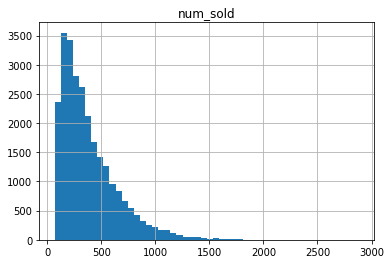

In [9]:
import matplotlib.pyplot as plt

df.hist(bins=50)
plt.show()

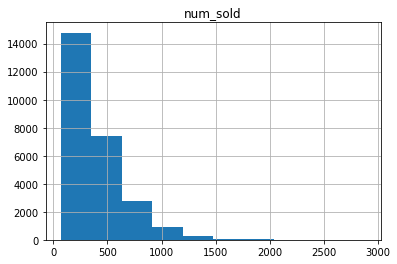

In [10]:
df.hist()
plt.show()

In [11]:
df['country'].replace(['Finland', 'Norway', 'Sweden'], [1, 2, 3], inplace=True)
df['store'].replace(['KaggleMart', 'KaggleRama'], [1, 2], inplace=True)
df['product'].replace(['Kaggle Mug', 'Kaggle Hat', 'Kaggle Sticker'], [1, 2, 3], inplace=True)

In [12]:
from sklearn.model_selection import train_test_split
X = df.drop(['date', 'num_sold'], axis=1)  
y = df['num_sold']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
X.head()

,country,store,product
0,1,1,1
1,1,1,2
2,1,1,3
3,1,2,1
4,1,2,2


In [14]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='liblinear',max_iter=100)

In [15]:
#Training
LR.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [16]:
pred=LR.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.004372623574144487